# Simulation of a Rocket Flight
#### Hope is to make a workable simulation of a rocket's flight to explain physics priciples to my physics of rocketry flight. Thought it may be a good place to practice some math and real time data visulation. 

Let's do a test flight with a super simple physics simulation. We will do a super basic projectile problem of a rocket.

Define the problem: A rocket is shot up into the air with a mass X and the engine exerts a force of XX on the rocket for the duration of the rocket's booting through flight. Once the rocket engine burns out, the rocket is then in free fall until it reaches the ground. 

mass = m

velocity = v

force = F

acceleration of rocket = a 

acceleration due to gravity = g = 9.8 m/s^2

t = time

∆t = timestep 



In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets

In [4]:
def append_all(time, y_position, velocity, force, acceleration):
    a_data.append(acceleration)
    y_data.append(y_position)
    v_data.append(velocity)
    t_data.append(time)
    f_data.append(force)
    

def velocity(initial_velocity, acceleration, time_step):
    v = (initial_velocity + acceleration*time_step)
    return v

def net_force_during_thrust(thrust, drag, weight):
    force = thrust - drag - weight
    return force
    
def net_force_after_thrust(drag, weight):
    force = -drag - weight
    return force
    
def mass(rocket_mass, total_fuel, fuel_consumption_rate): 
    m = rocket_mass
    return m

def acceleration(force, mass):
    return force / mass
    

In [8]:
# Asking users to input variables. 

while True:
    try:
        mass = int(input('Mass of Rocket (Value between 1 and 100): '))
        if mass < 1 or mass > 100:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. The number must be in the range of 1-10.")

Mass of Rocket (Value between 1 and 100): -10
Invalid integer. The number must be in the range of 1-10.
Mass of Rocket (Value between 1 and 100): 120
Invalid integer. The number must be in the range of 1-10.
Mass of Rocket (Value between 1 and 100): cat
Invalid integer. The number must be in the range of 1-10.
Mass of Rocket (Value between 1 and 100): 56


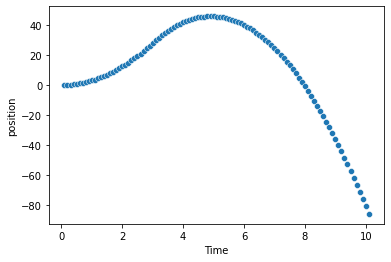

In [7]:


y = 0
v = 0
a = 0
g = 9.81
t = 0
F = 100 - 2*t
time_of_force = 3
t_step = 0.1


a_data = []
y_data = []
v_data = []
t_data = []
f_data = []

while t < 10: 
    if t <= time_of_force:
        F = 100
        a = F/mass
        y = (y + v*t_step + 1/2*a*t_step**2)
        v = velocity(v, a, t_step)
        t += t_step
        append_all(t, y, v, F, a)
    else:
        a = -g
        y = (y + v*t_step + 1/2*a*t_step**2)
        v = (v + a*t_step)
        t += t_step
        append_all(t, y, v, F, a)

        
data_list = [y_data, v_data, a_data]
data_headings = ['position', 'velocity', 'acceleration']

df = pd.DataFrame({"Time":t_data})

for i in range(len(data_list)):
    df[data_headings[i]] = data_list[i]
    
# print(df.sample(5))
sns.scatterplot(data = df, x='Time', y='position')
plt.pyplot.show()
